# Project 001 UCSD Data Science Visualization Bootcamp
* Noreen Malik 😃
* Rene Venema("dutch") 🐱
* John Warlop 🦁
* Alex Wooten 🏄

😛😳😗😓🙉😸🙈🙊😽💀💢💥✨💏👫👄👃👀👛👛🗼🔮🔮🎄🎅👻

## Dependencies -- imports


In [1]:
import pandas as pd
from sodapy import Socrata #pip install socrata
import plotly.plotly as py #pip install plotly
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import json


## Constants -- API Keys, etc

In [2]:
# Read in API(.gitignore file has entry for api_keys.json file)
API_endpoint = "https://data.cms.gov/resource/spmh-qjdv.json" #2015 data


IRS_DATAFRAME_PICKLE = 'df_irs.pkl'
with open('api_keys.json') as json_data:
    api_keys = json.load(json_data)

# Socrata Section
socrata_domain = "data.cms.gov"
socrata_dataset_identifier = "spmh-qjdv"
socrata_token = api_keys['socrata']['App_Token']
#print(api_keys['socrata']['App_Token'])
#print(api_keys['socrata']['Secret_Token'])
#print(api_keys['zillow']['ZWSID'])



## Functions 


In [3]:
def return_irs_df(file_name):
    #return the pickled dataframe for irs data
    df_irs = pd.read_pickle(file_name)
    return(df_irs)

# IRS Dataframe
[Link to Documentation](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2015-zip-code-data-soi) |
[SOI Tax Stats](https://www.irs.gov/statistics/soi-tax-stats-statistical-methodology) | [Data Cleaning of IRS Data](https://docs.google.com/document/d/1kNd1S_Ufgy0pIjJSjLDHba8y-pK8OYe47iAGeamH04E/edit?usp=sharing)

In [35]:
# Dataframe columns are: ST(State), Zip(Zip Code), AGI(Adjusted Gross Income),\
# TtlR(Total Returns)
# TtlSR(Total Single Returns), TtlJR(Total Joint Returns),\
# Eld(Number of Elderly Returns -- over 60 years old)
# AGI column is agreegated: 
# 1=> [1-25000), 2=> [25000-50000), 3=> [50000-75000), 4=> [75000-100000),
# 5=> [100000,200000), 6=> [200000-]
df_irs = return_irs_df(IRS_DATAFRAME_PICKLE)
df_irs = df_irs.rename(columns={'Zip':'zip'})
# Breakout Each AGI bin into separate dataframe
df_zip_25K = df_irs[df_irs['AGI']==1]
df_zip_50K = df_irs[df_irs['AGI']==2]
df_zip_75K = df_irs[df_irs['AGI']==3]
df_zip_100K = df_irs[df_irs['AGI']==4]
df_zip_200K = df_irs[df_irs['AGI']==5]
df_zip_1M   = df_irs[df_irs['AGI']==6]
df_zip_25K.head(2)
#zip_s = df_irs['Zip'].tolist()
#zip_s = ['0'+str(s) if len(str(s)) == 4 else str(s) for s in zip_s]
#df_irs['Zip']= zip_s
#gb_dict_irs = dict(list(df_irs.groupby(['Zip','AGI'])))
#print(gb_dict_irs)

,ST,zip,AGI,TtlR,TtlSR,TtlJR,Eld
0,AL,0,1,836320.0,481570.0,109790.0,149910.0
6,AL,35004,1,1490.0,970.0,230.0,350.0


# Dataframe - Medicare csv/api (dutch)
[Link to Documentation](https://dev.socrata.com/foundry/data.cms.gov/ehrv-m9r6)


In [ ]:
#main_df = pd.read_csv("main_data_cleaned.csv")
#main_df.head()
client = Socrata(socrata_domain, socrata_token)
results = client.get(socrata_dataset_identifier, limit = 100000000) #default for limit (integer) = 1000
main_df = pd.DataFrame.from_dict(results)
main_df.head()
# Convert column datatypes
## Convert to float
col1 = ["average_covered_charges","average_medicare_payments","average_total_payments"]
main_df[col1] = main_df[col1].astype("float")
## Convert to integer
col2 = ["provider_id","provider_zip_code","total_discharges"]
main_df[col2] = main_df[col2].astype("int")
# Export data to csv file
main_df.to_csv("main data cleaned.csv", encoding = "utf-8-sig", index = False)

In [20]:
# Import data from csv
main_df = pd.read_csv("main data cleaned.csv")
main_df.head(1)

,average_covered_charges,average_medicare_payments,average_total_payments,drg_definition,hospital_referral_region_hrr_description,provider_city,provider_id,provider_name,provider_state,provider_street_address,provider_zip_code,total_discharges
0,1014783.45,141193.91,171081.18,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,AL - Birmingham,BIRMINGHAM,10033,UNIVERSITY OF ALABAMA HOSPITAL,AL,619 SOUTH 19TH STREET,35233,11


# Avg Cost Per Provider (Alex)

In [15]:
# ACC = Average Covered Charges
#     The provider's average charge for services covered by Medicare for all discharges
#     in the DRG. These will vary from
#     hospital to hospital because of differences in hospital charge structures.
# ATP = Average Total Payments
#     The average of Medicare payments to the provider for the DRG including the
#     DRG amount, teaching,  disproportionate 
#     share, capital, and outlier payments for all cases. Also included 
#     are co-payment and deductible amounts that the 
#     patient is responsible for (average_medicare_payments)
# AMP = Average Medicare Payments
#     average_medicare_payments_2?
#     Not sure what this column represents

# A reduced DF with just the info that I need
cost_df = main_df[["provider_id", "provider_name", "provider_zip_code", "average_covered_charges",
                   "average_total_payments", "average_medicare_payments"]]

provider_group = cost_df.groupby(["provider_id", "provider_name", "provider_zip_code"])
# provider_group = cost_df.groupby(["provider_id", "provider_name"])
avg_cost_group = round(provider_group.mean(),2)
avg_cost_group.columns
# len(avg_cost_group)


Index(['average_covered_charges', 'average_total_payments',
       'average_medicare_payments'],
      dtype='object')

In [9]:
# Most Expensive Hospitals based on out-of-pocket charges

avg_cost_group["average_patient_payment"] = (avg_cost_group["average_total_payments"]-
                                             avg_cost_group["average_medicare_payments"])
# Sort values in descending order and view DataFrame
# avg_cost_group.sort_values(by=["average_patient_payment"], ascending=False).head()

In [10]:
# Bar graph of top 10 most expensive hospitals based on out-of-pocket expenses

# len(avg_cost_group["average_covered_charges"])
import matplotlib.pyplot as plt
import numpy as np

# get the top 10 most expensive hospitals
plt.figure(1, figsize=(120,30))
x_axis = np.arange(0,10)
top_10_expensive = avg_cost_group["average_patient_payment"].sort_values(ascending=False).head(10)
tick_locations = [value for value in x_axis]
# print(list(top_10_expensive.reset_index()["provider_name"]))
plt.xticks(tick_locations, list(top_10_expensive.reset_index()["provider_name"]), size=35, rotation=45)
plt.yticks(size=60)

plt.ylabel("Dollars", size=70)
plt.title("Top 10 Most Expensive Providers Based on Out-of-Pocket Charges", size=80)

# Show graph
plt.bar(x_axis, top_10_expensive)

<Container object of 10 artists>

<Container object of 10 artists>

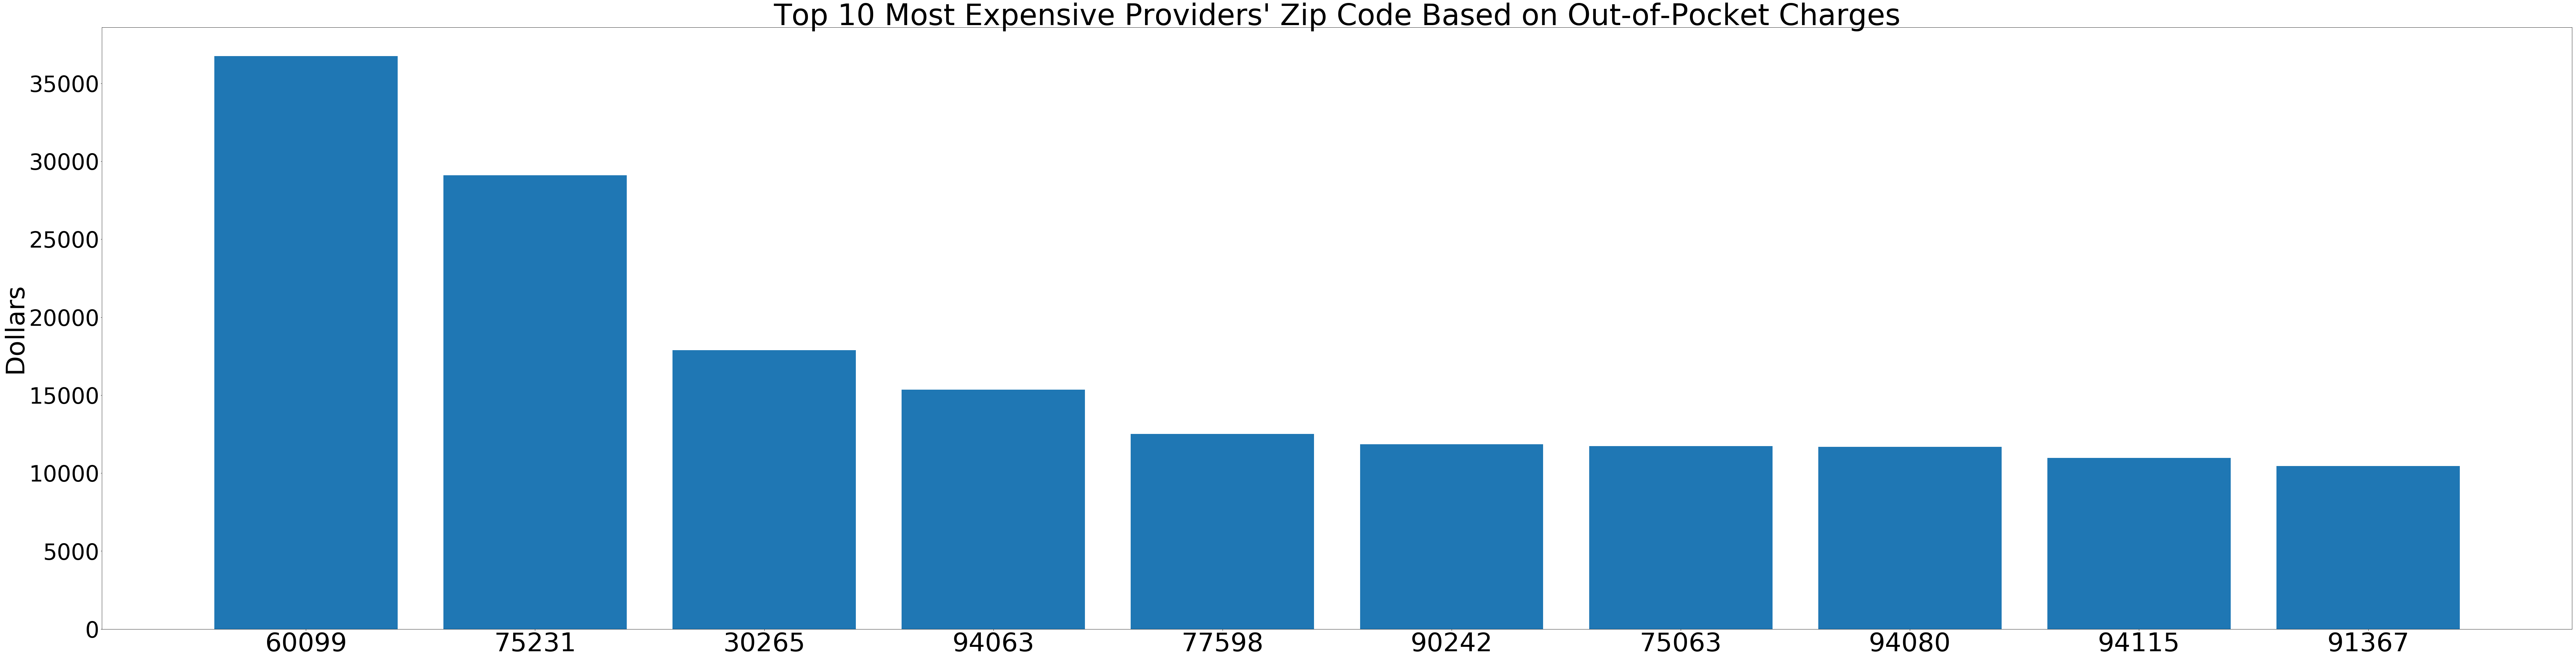

In [11]:
# Bar graph of top 10 most expensive hospitals based on out-of-pocket expenses, shown as their zip code

top_10_expensive_zip = avg_cost_group["average_patient_payment"].sort_values(ascending=False).head(10)

plt.figure(2, figsize=(120,30))
x_axis = np.arange(0,10)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(top_10_expensive_zip.reset_index()["provider_zip_code"]), size=70)
plt.yticks(size=60)
plt.ylabel("Dollars", size=70)
plt.title("Top 10 Most Expensive Providers' Zip Code Based on Out-of-Pocket Charges", size=80)

# Show graph
plt.bar(x_axis, top_10_expensive)

In [12]:
provider_group2 = cost_df.groupby(["provider_zip_code"])

# Get the mean value of all charges grouped by provider_zip_code, drop provider_id column
avg_cost_group2 = round(provider_group2.mean(),2).drop(columns=["provider_id"])

# add average_patient_payment column
avg_cost_group2["average_patient_payment"] = (avg_cost_group2["average_total_payments"]-
                                             avg_cost_group2["average_medicare_payments"])
# View whole DataFrame grouped by zip code in descending order
# avg_cost_group2.sort_values(by=["average_patient_payment"], ascending=False)

<Container object of 10 artists>

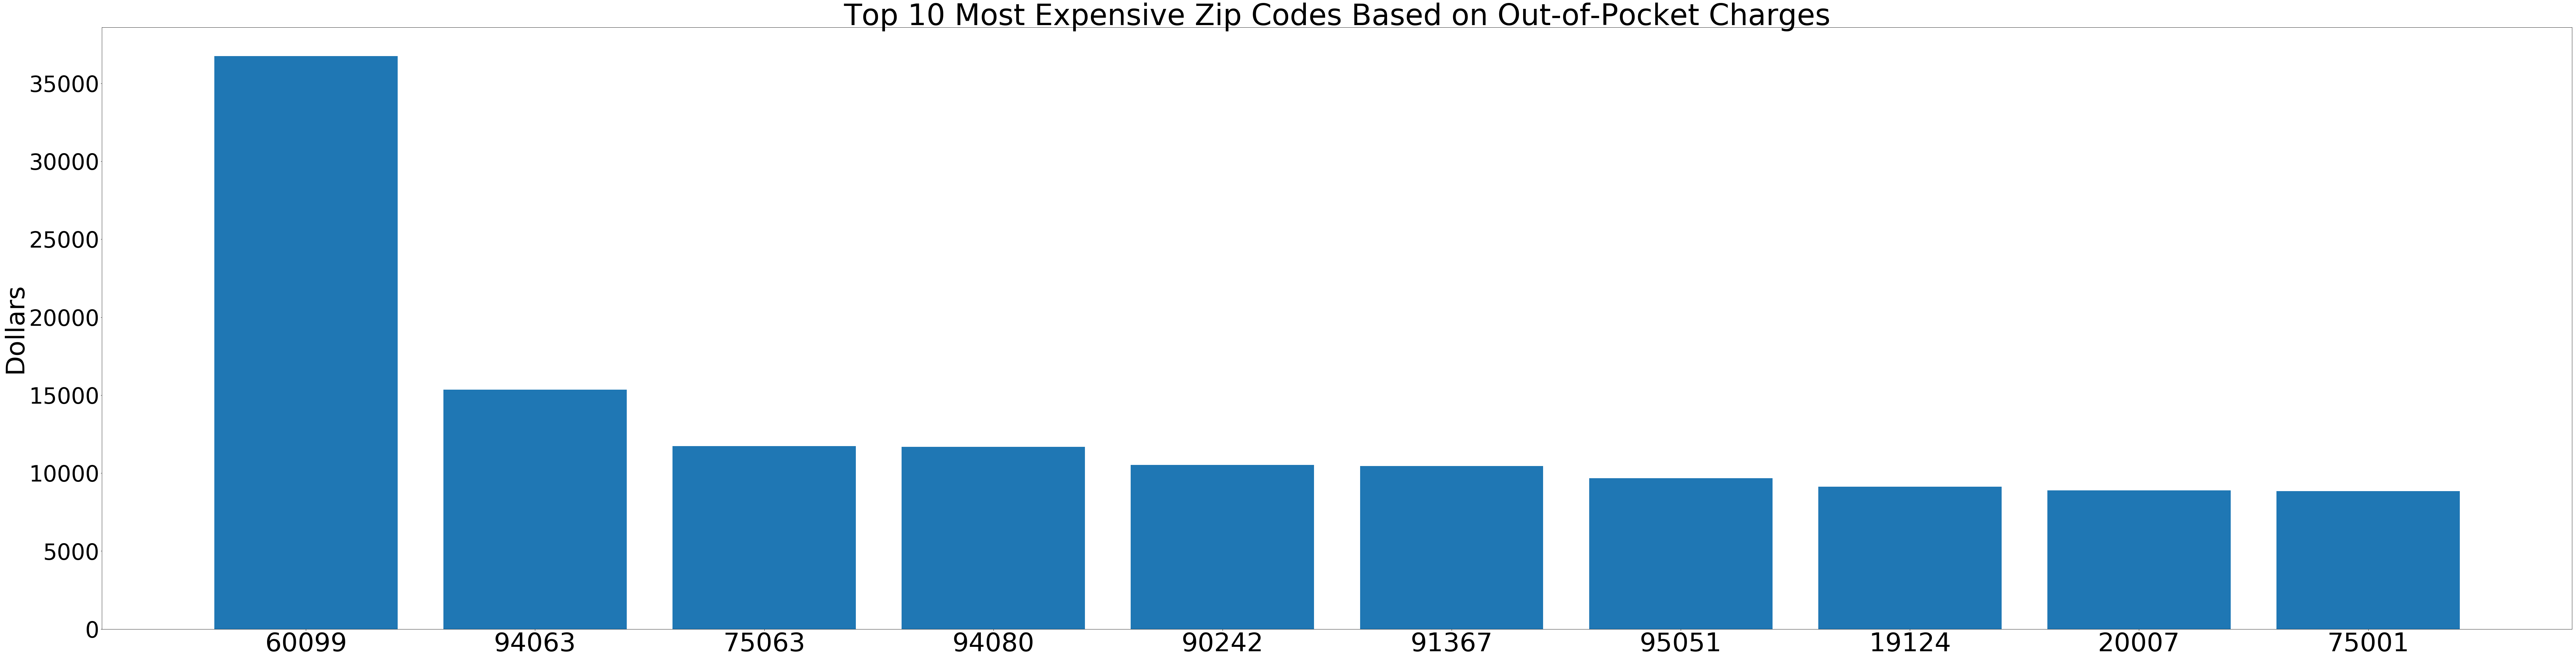

In [13]:
# Bar graph of average out-of-pocket expenses for all hopsitals in a zip code

# Create variable to be used in y-axis sorted descending order
top_10_expensive_zip_avg = avg_cost_group2["average_patient_payment"].sort_values(ascending=False).head(10)

plt.figure(3, figsize=(120,30))
x_axis = np.arange(0,10)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(top_10_expensive_zip_avg.reset_index()["provider_zip_code"]), size=70)
plt.yticks(size=60)
plt.ylabel("Dollars", size=70)
plt.title("Top 10 Most Expensive Zip Codes Based on Out-of-Pocket Charges", size=80)

# Show graph
plt.bar(x_axis, top_10_expensive_zip_avg)

In [20]:
cost_df2 = main_df[["hospital_referral_region_hrr_description", "average_covered_charges",
                   "average_total_payments", "average_medicare_payments"]]
cost_df2

provider_group3 = cost_df2.groupby(["hospital_referral_region_hrr_description"])
avg_cost_group3 = round(provider_group3.mean(),2)

# add average_patient_payment column
avg_cost_group3["average_patient_payment"] = (avg_cost_group3["average_total_payments"]-
                                             avg_cost_group3["average_medicare_payments"])
# View DF sorted descending
# avg_cost_group3.sort_values(by=["average_patient_payment"], ascending=False)

,average_covered_charges,average_total_payments,average_medicare_payments,average_patient_payment
hospital_referral_region_hrr_description,,,,
MN - Rochester,47884.45,23512.29,18627.61,4884.68
LA - New Orleans,60261.41,16553.62,12431.44,4122.18
CA - San Francisco,128930.95,25514.41,21746.08,3768.33
VA - Charlottesville,47691.80,16193.19,12542.24,3650.95
CA - San Mateo County,183152.20,28100.26,24620.44,3479.82
NY - Manhattan,70296.20,22399.72,19031.32,3368.40
UT - Salt Lake City,43444.64,16118.37,12799.34,3319.03
NH - Lebanon,52608.34,21611.75,18371.33,3240.42
IL - Aurora,64663.87,12492.32,9302.57,3189.75


<Container object of 10 artists>

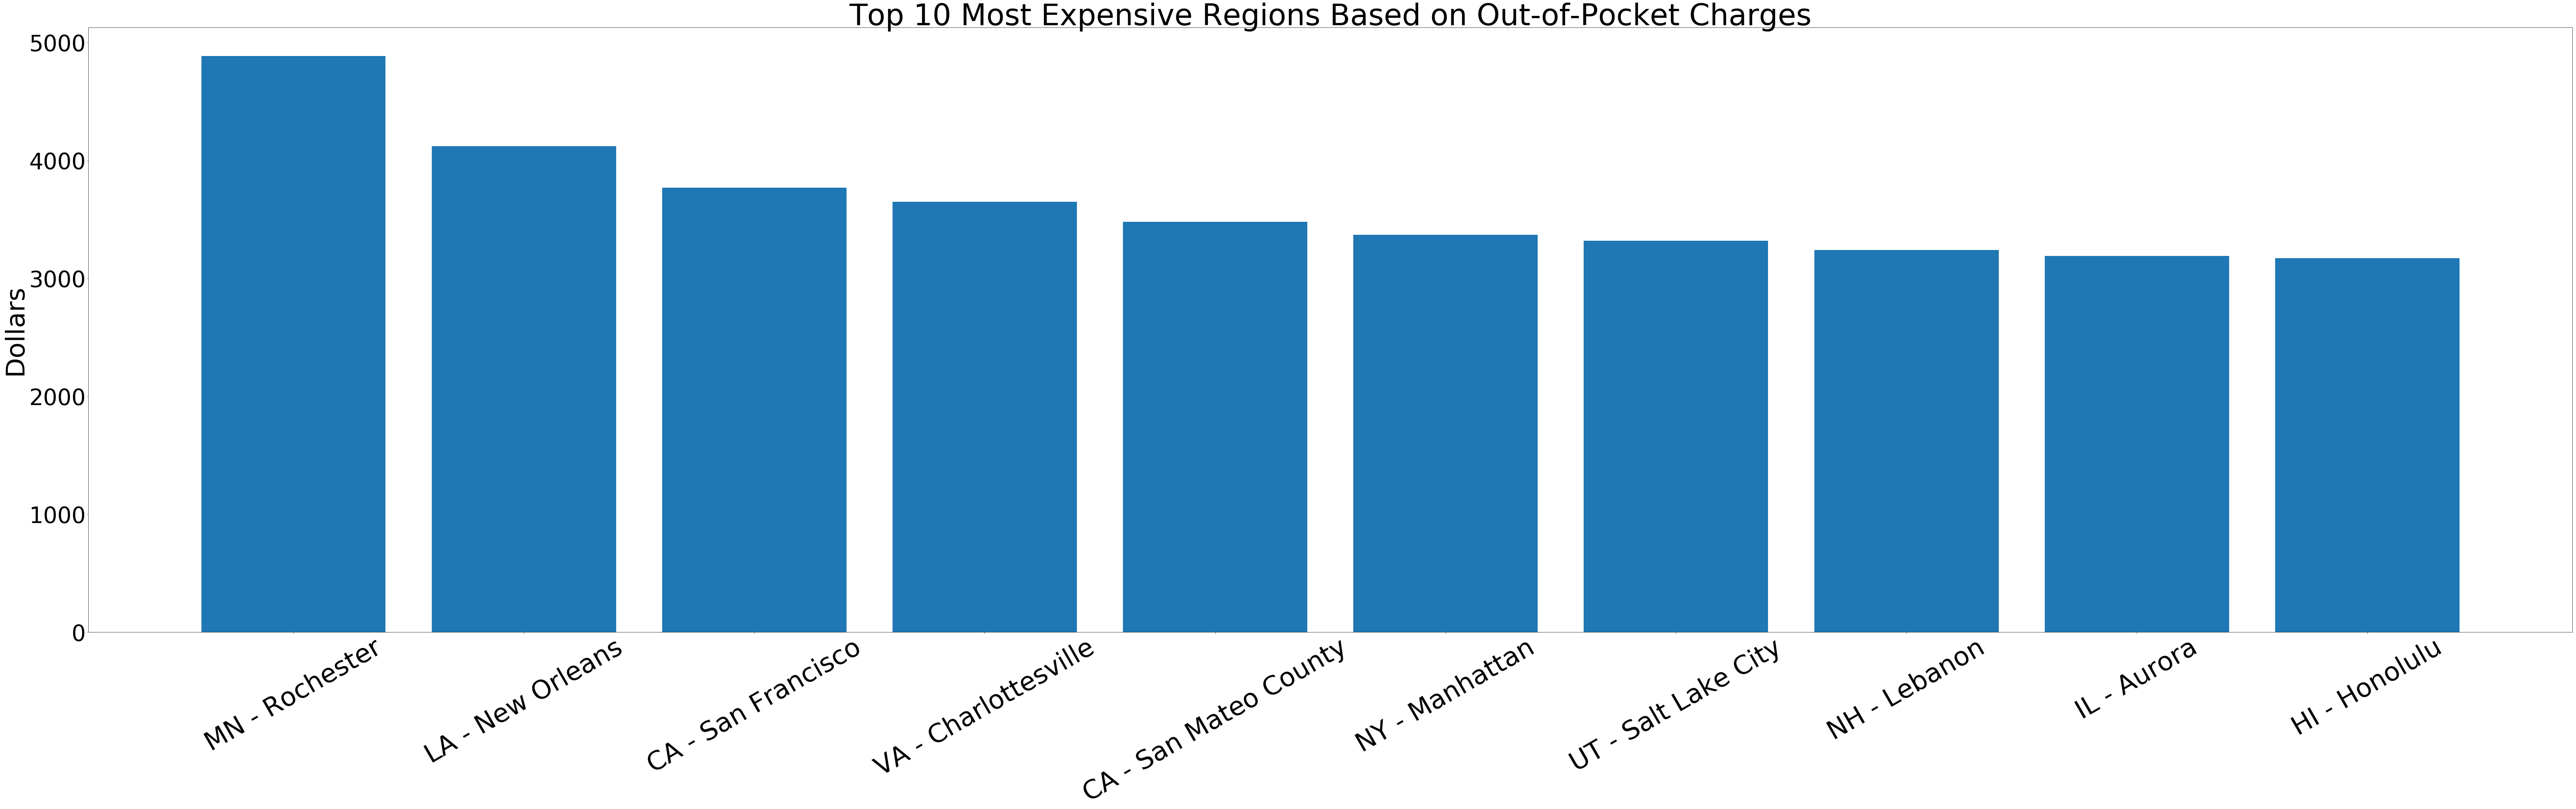

In [23]:
# Bar graph of average out-of-pocket expenses for all hopsitals in a zip code

# Create variable to be used in y-axis sorted descending order
top_10_expensive_region_avg = avg_cost_group3["average_patient_payment"].sort_values(ascending=False).head(10)

plt.figure(4, figsize=(120,30))
x_axis = np.arange(0,10)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(top_10_expensive_region_avg.reset_index()["hospital_referral_region_hrr_description"]), 
           size=70, rotation=30)
plt.yticks(size=60)
plt.ylabel("Dollars", size=70)
plt.title("Top 10 Most Expensive Regions Based on Out-of-Pocket Charges", size=80)

# Show graph
plt.bar(x_axis, top_10_expensive_region_avg)

# Avg Cost of Procedure in each state(John)

In [37]:
#main_df['ACC'].groupby(main_df['Provider State']).head()
#state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
#main_df.rename(columns = {list(main_df)[8]: 'TtlDis'}, inplace = True)
df_costs = main_df.groupby(['provider_state']).\
            aggregate({'average_covered_charges':'sum',\
                       'average_total_payments':'sum','total_discharges':'sum'})
df_costs['Ttl_billed_per_p']  = (df_costs['average_covered_charges']+\
                                 df_costs['average_total_payments'])\
                                /df_costs['total_discharges']
df_costs['Ttl_covered_per_p'] =  df_costs['average_covered_charges']/\
                                    df_costs['total_discharges']
df_costs['Ttl_oop_per_p'] = df_costs['average_total_payments']/\
                                    df_costs['total_discharges']
df_costs.columns


Index(['average_covered_charges', 'average_total_payments', 'total_discharges',
       'Ttl_billed_per_p', 'Ttl_covered_per_p', 'Ttl_oop_per_p'],
      dtype='object')

# Comparing procedure costs vs income in zip code(John)

In [38]:
df_zip = main_df.groupby(['provider_zip_code']).\
            aggregate({'average_covered_charges':'sum',\
                       'average_medicare_payments':'sum',\
                       'average_total_payments':'sum','total_discharges':'sum'})
new_idx = [i for i in range(0,df_zip.shape[0])]
zc_v = df_zip.index.tolist()
df_zip['idx']=new_idx
df_zip['zip']=zc_v
df_zip.set_index('idx',inplace=True)
#df_zip['zip'] = df_zip['zip'].astype(str)
#zip_s = df_zip['zip'].tolist()
#zip_s = ['0'+s if len(s) == 4 else s for s in zip_s]
#df_zip['zip']=zip_s
#df_zip.shape
merged_25K = pd.merge(df_zip,df_zip_25K,on='zip',how='inner')
merged_50K = pd.merge(df_zip,df_zip_50K,on='zip',how='inner')
merged_75K = pd.merge(df_zip,df_zip_75K,on='zip',how='inner')
merged_100K = pd.merge(df_zip,df_zip_100K,on='zip',how='inner')
merged_200K = pd.merge(df_zip,df_zip_200K,on='zip',how='inner')
merged_1M   = pd.merge(df_zip,df_zip_1M,on='zip',how='inner')
merged_1M.head(2)

,average_covered_charges,average_medicare_payments,average_total_payments,total_discharges,zip,ST,AGI,TtlR,TtlSR,TtlJR,Eld
0,545604.60,370522.22,418877.08,1347,1040,MA,6,200.0,30.0,160.0,70.0
1,1248497.52,492525.67,560581.35,1942,1060,MA,6,460.0,70.0,370.0,190.0


# Data Exploration

## Dutch

In [39]:
# Unique DRG definitions
main_df["drg_definition"].nunique()

563

In [40]:
# Unique HRR Descriptions
main_df["hospital_referral_region_hrr_description"].nunique()

306

In [41]:
# Unique providers
main_df["provider_id"].nunique()# Unique states (including the federal district D.C. (Washington D.C.))
main_df["provider_state"].nunique()

51

In [42]:
# Providers per state
main_df.groupby("provider_state")["provider_id"].nunique()

provider_state
AK      8
AL     83
AR     44
AZ     59
CA    294
CO     45
CT     29
DC      7
DE      6
FL    167
GA    100
HI     12
IA     34
ID     13
IL    126
IN     86
KS     53
KY     65
LA     86
MA     57
MD     47
ME     18
MI     94
MN     48
MO     74
MS     56
MT     13
NC     81
ND      7
NE     24
NH     13
NJ     64
NM     27
NV     21
NY    151
OH    128
OK     81
OR     34
PA    152
RI     11
SC     54
SD     19
TN     92
TX    285
UT     31
VA     74
VT      6
WA     48
WI     65
WV     29
WY     10
Name: provider_id, dtype: int64

In [43]:
# US state map
## Total ACC, ATP and AMP by provider state
state_totals_df = main_df.groupby("provider_state", as_index = False).agg({"provider_id":"nunique",
                                                                           "average_covered_charges":"sum",
                                                                           "average_medicare_payments":"sum",
                                                                           "average_total_payments":"sum"})

cols = ["average_covered_charges","average_medicare_payments","average_total_payments"]
state_totals_df[cols] = state_totals_df[cols]/1000000

state_totals_df = state_totals_df.rename(columns={"provider_state":"State",
                                                  "provider_id":"Total providers",
                                                  "average_covered_charges":"ACC Total",
                                                  "average_medicare_payments":"AMP Total",
                                                  "average_total_payments":"ATP Total"
                                                 })

state_totals_df.head()

for col in state_totals_df.columns:
    state_totals_df[col] = state_totals_df[col].astype(str)

In [44]:
scl = [[0.0, "rgb(242,240,247)"],[0.2, "rgb(218,218,235)"],[0.4, "rgb(188,189,220)"],
            [0.6, "rgb(158,154,200)"],[0.8, "rgb(117,107,177)"],[1.0, "rgb(84,39,143)"]]

In [45]:
state_totals_df['text'] = state_totals_df["State"] + '<br>' +\
    "ACC"+state_totals_df["ACC Total"]+' AMP '+state_totals_df["AMP Total"]+'<br>'+\
    'ATP '+state_totals_df["ATP Total"]

In [46]:
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_totals_df["State"],
        z = state_totals_df["Total providers"].astype(float),
        locationmode = 'USA-states',
        text = state_totals_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2015 US Medicare inpatient charges and payments by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )